In [1]:
# In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the load_dataset method in seaborn module.
# The goal will be to use linear regression to predict mpg - miles per gallon.

# a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

import seaborn as sns

df = sns.load_dataset(name="mpg")
df.dropna(inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [2]:
df.shape , df.columns
# df.info() #inga null-värden
# mpg = miles per gallon - detta ska vi predicta, detta är våran Targetd

((392, 9),
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model_year', 'origin', 'name'],
       dtype='object'))

In [3]:
# b) Use describe only on those columns that are relevant to get statistical information from.
df.describe().T.drop("count" ,axis=1)
# mpg är target (Y), X = Välj alla kolumner som kan påverka target, exludera kolumner är direkt härledda FRÅN target
# X borde vara: cylinders, 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year' 
# df["model_year"].unique()


,mean,std,min,25%,50%,75%,max
mpg,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


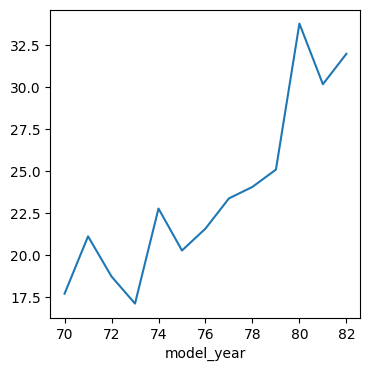

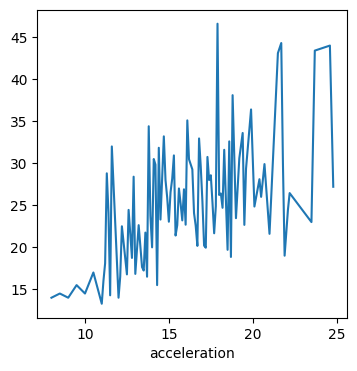

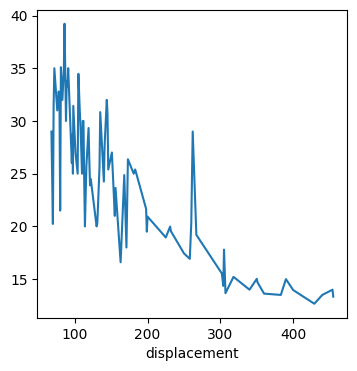

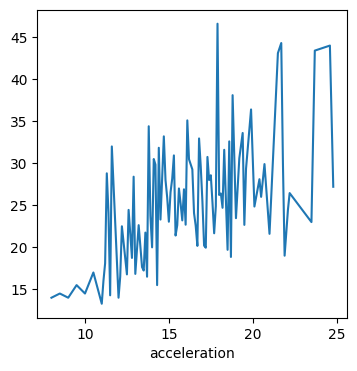

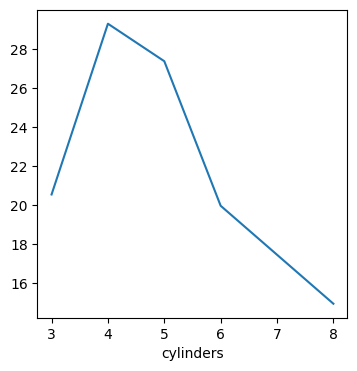

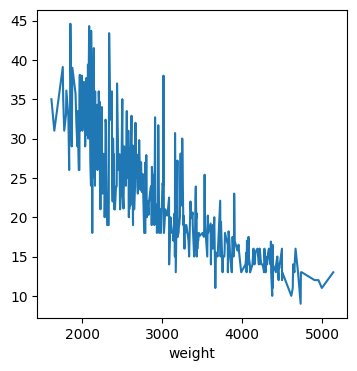

In [4]:

# c) Make some plots on some of the columns that you find interesting.
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
df.groupby("model_year")['mpg'].mean().plot()

plt.figure(figsize=(4,4))
df.groupby("acceleration")["mpg"].mean().plot()

plt.figure(figsize=(4,4))
df.groupby("displacement")["mpg"].mean().plot()

plt.figure(figsize=(4,4))
df.groupby("acceleration")["mpg"].mean().plot()

plt.figure(figsize=(4,4))
df.groupby("cylinders")["mpg"].mean().plot()

plt.figure(figsize=(4,4))
df.groupby("weight")["mpg"].mean().plot()

plt.show()

In [5]:

# d) Check if there are any columns you might want to drop.
df.head() # borde droppa origin och name? 
df_cleaned = df.drop(columns=["origin", "name"])
df_cleaned.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70



# 1. Linear regression on mpg dataset


In [6]:
# a) We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. 



## 1. Dela upp datan i train|test

In [7]:
X, y = df_cleaned[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year' ]] , df_cleaned["mpg"]
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [8]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [9]:
X.shape, y.shape

((392, 6), (392,))

In [10]:
# Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print(f"X_train = {X_train.shape}") 
print(f"X_test = {X_test.shape}") 
print(f"y_train = {y_train.shape}")
print(f"y_test = {y_test.shape}")

X_train = (313, 6)
X_test = (79, 6)
y_train = (313,)
y_test = (79,)


## 2. Scala datan ( ? )

In [11]:
# b) Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. 
# It should take in parameters of X_train, X_test, y_train, y_test, model. 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
type(scaler)


sklearn.preprocessing._data.MinMaxScaler

In [12]:
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) # transformera tränings-datan
scaled_X_test = scaler.transform(X_test) # transformera test-datan
# scaled_X_train[:1],scaled_X_test[:1]

In [13]:
print(f"{scaled_X_train.min() = }")
print(f"{scaled_X_train.max() = }")
# dessa nedan är inte 0 eller 1, för vi har fittat dom från train-datan. Normalization. Om test datan blir 0 eller 1, så är något fel och data leakage har skett
print(f"{scaled_X_test.min() = }")
print(f"{scaled_X_test.max() = }")

scaled_X_train.min() = np.float64(0.0)
scaled_X_train.max() = np.float64(1.0)
scaled_X_test.min() = np.float64(-0.0051948051948051965)
scaled_X_test.max() = np.float64(1.0)


## Detta behövs inte ? ^

In [14]:

# Now create a linear regression model using scikit-learns LinearRegression() (OLS normal equation with SVD) and call your function to get metrics.

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
type(model)
# X_train.isna().value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [16]:
#Träna modellen på TRÄNINGS-datan (aldrig på test-datan!), y_train är vårat facit!
model.fit(X_train, y_train)
print(f"Parameters: {model.coef_}") #våra parametrar, w1, w2, w3 - våra weights/parameters/coefficents.
print(f"Intercept: {model.intercept_}") #intercept = skärpunkt

Parameters: [-0.116173    0.00101347 -0.00227634 -0.00656101  0.06173551  0.76063644]
Intercept: -15.057758585282404


# 4. Predicta datan

In [17]:
#modellens prediction på mpg: 
y_pred = model.predict(X_test)
y_pred[:5]

array([25.93279618, 26.29927859, 32.96548909, 26.8544302 , 29.45372581])

In [18]:
#faktiskt mpg utifrån vårat facit, y_test: 
y_test.iloc[:5]

79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
Name: mpg, dtype: float64

# 5. Evaluate

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
mae = mean_absolute_error (y_test, y_pred)
mse = mean_squared_error (y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"{mae = }")
print(f"{mse = }")
print(f"{rmse = }")

mae = 2.503860089776125
mse = 10.502370329417303
rmse = 3.2407360783342574


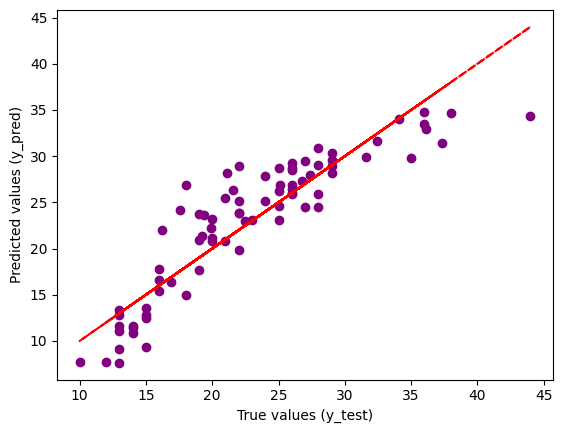

In [ ]:
plt.scatter(x=y_test,y= y_pred, color="purple")
plt.xlabel("True values (y_test)")
plt.ylabel("Predicted values (y_pred)")
plt.plot(y_test,y_test, "r--")
plt.show()
